In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, integrate, linalg, signal
import sys, os
from pyDigHolo import digHolo
%matplotlib widget

# Load data

In [52]:
dll_path = 'digHoloV2.dll'
dll_path = os.path.abspath("../digHolo/libdigholo.so")
# folder_path = r"F:\Sebastien\TM_exp\data\19-07-2022_17h09_2_9_4.50e-04"
folder_path = r"./"

## POLA 1
file_name = r"experimental_frames.npz" 
file_path = os.path.sep.join((folder_path, file_name))
data = np.load(file_path)
frames = data['frames']
ref = data['reference']

In [53]:
from scipy.ndimage import zoom
zoom_value = .85
frames = np.array([zoom(f,zoom_value) for f in frames])
ref = zoom(ref,zoom_value)

Text(0.5, 1.0, 'Reference alone')

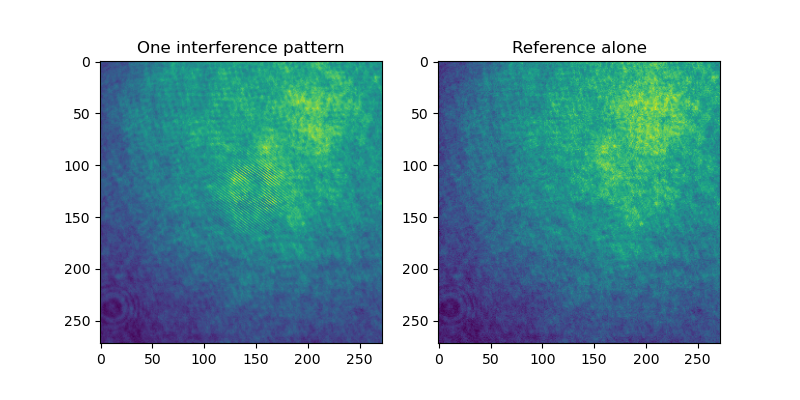

In [54]:
ind = 45

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(frames[ind])
plt.title('One interference pattern')
plt.subplot(122)
plt.imshow(ref)
plt.title('Reference alone')

# Calibration

## Polarization

In [55]:
frameCount = batchCount = frames.shape[0]
pixelSize = 5.86e-6
nx = frameWidth = frames.shape[1]
ny = frameHeight = frames.shape[2]
lambda0 = 632e-9
# nx = ny = cut_width
winFFTRadius = 0.17
resolutionMode = 0
maxMG = 1
polCount = 1

In [56]:
dh = digHolo(dll_path)

dh.ConfigOffAxis(
    [frameWidth, frameHeight],
    [nx, ny], 
    resolutionMode,
    pixelSize,
    lambda0, 
    maxMG,
    polCount
)
dh.ConfigSetAutoAlign(
    enable_align_beam_centre=False,
    enable_align_defocus=False,
    enable_align_tilt=True,
    enable_align_basis_waist=True,
    enable_align_fourier_win_radius=False,
)
# 

In [57]:
dh.SetBatch(frameCount, frames, dataType = 'Python')
dh.AutoAlign()
dh.SetFourierWindowRadius(winFFTRadius)
dh.SetRefCalibrationIntensity(ref)
dh.ProcessBatch()
fields = dh.GetFields()

50
<AUTO ALIGN>
<Parameter estimate>
Batch Count : 50
FFT size changed
	Planning FFT (WoI)	:	272 x 272	(1:4)
	Planning FFT (WoI)	:	272 x 272	(1:3)
	Planning FFT (WoI)	:	272 x 272	(1:1)
Fourier plane
Tilt	0	0.817882,0.000000
	Planning IFFT (WoI)	:	272 x 272	(1:4)
	Planning IFFT (WoI)	:	272 x 272	(1:3)
	Planning IFFT (WoI)	:	272 x 272	(1:1)
Camera plane
0	50	BeamCentre	(1.311155e-05	-1.388897e-04)	MFD:4.305910e-04	Defocus:0.000000	TotalPwr:81709.140625	MaxV:6004.564941	Aeff:6.303396e-07
Parameter estimate time (ms)	53.830214
</Parameter estimate>
<Parameter tweak>
Group count changed
HG indices.
Allocating digHoloHGX/Y, scales etc.
Allocating digHoloHG
Referencing pointers
Allocated basis 1 x 272 x 272 
Reallocated coefs 1 x 1

Intel MKL ERROR: Parameter 13 was incorrect on entry to CGESVD.
	Goal Metric:	-inf	IL:-inf	MDL:-nan	(Hz:4.880843)	dt: [0.204883 s] dErr	340282346638528859811704183484516925440.000000 
		Pol:0	Tilt:	0.785	-0.011	Defocus:	0.000	Waist:	311.562	Centre:	0.000	0.000

In

In [26]:
fields.shape

(50, 320, 320)

TypeError: Invalid shape (272,) for image data

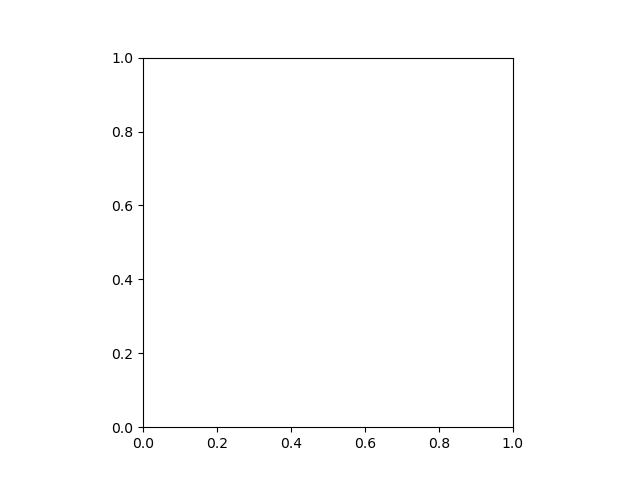

In [49]:
ref_dh = dh.GetRefCalibrationFields()

plt.figure()
plt.imshow(np.abs(ref_dh))
    
# plt.figure()
# plt.imshow(mean_abs_fields_1/crop_center(ref1, cut_width))

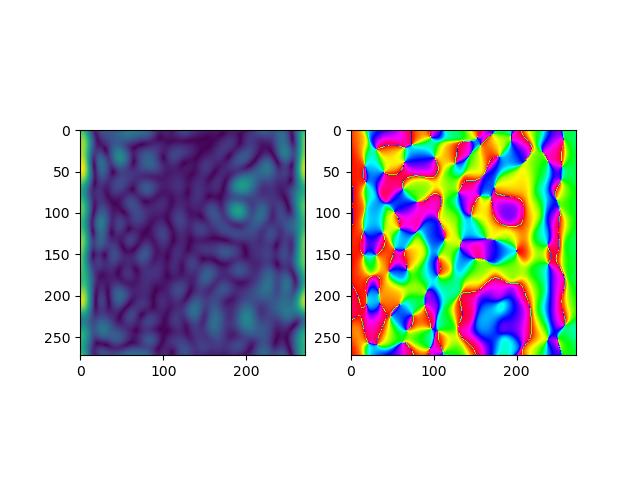

In [51]:

ind = 0

plt.figure()
plt.subplot(121)
plt.imshow(np.abs(fields[ind]))
plt.subplot(122)
plt.imshow(np.angle(fields[ind]), cmap = 'hsv')

### Average Intensity

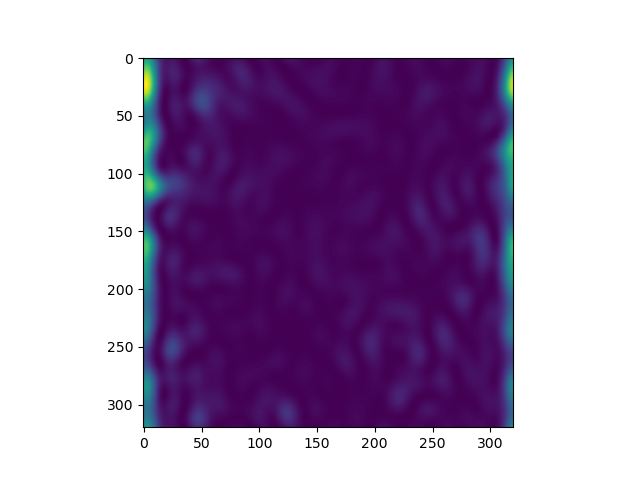

In [29]:
mean_abs_fields = np.mean(np.abs(fields)**2, axis = 0)

plt.figure()
plt.imshow(mean_abs_fields)


<IPython.core.display.Javascript object>


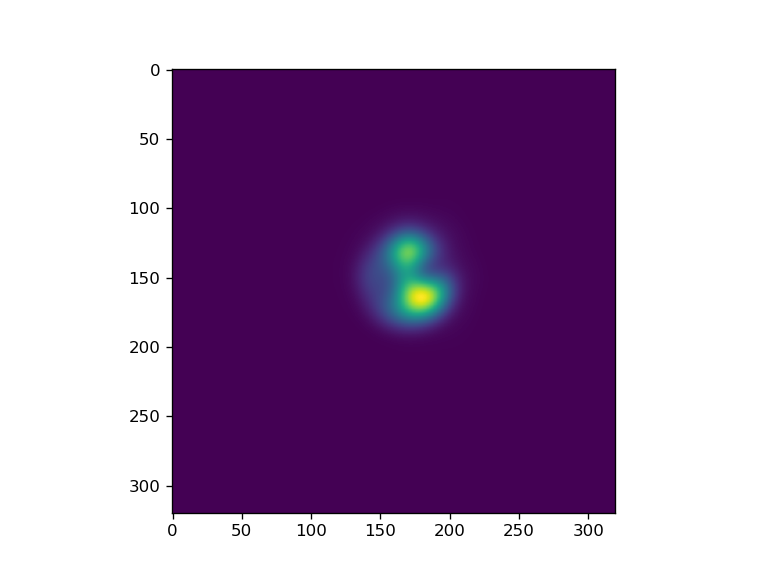

In [19]:
mean_abs_fields_1 = np.mean(np.abs(fields_calib_1)**2, axis = 0)

plt.figure()
plt.imshow(np.abs(mean_abs_fields_1))


### Save calibration

In [20]:
dh.SaveConfig('config_pola1.npz')

# digHolo

In [ ]:
AAA

In [ ]:
dh1 = digHolo(digHolo_dll_path)
dh1.ConfigOffAxis(
    [cut_width, cut_width],
    [nx, ny], 
    resolutionMode,
    pixelSize,
    lambda0, 
    maxMG,
    polCount
)
dh1.LoadConfig('config_pola1.npz')

dh1b = digHolo(digHolo_dll_path)
dh1b.ConfigOffAxis(
    [cut_width, cut_width],
    [nx, ny], 
    resolutionMode,
    pixelSize,
    lambda0, 
    maxMG,
    polCount
)
dh1b.LoadConfig('config_pola1.npz')


dh2 = digHolo(digHolo_dll_path)
dh2.ConfigOffAxis(
    [cut_width, cut_width],
    [nx, ny], 
    resolutionMode,
    pixelSize,
    lambda0, 
    maxMG,
    polCount
)
dh2.LoadConfig('config_pola2.npz')

In [ ]:
dh1.SetFourierWindowRadius(0.17)
dh1b.SetFourierWindowRadius(0.25)
dh2.SetFourierWindowRadius(0.17)

In [ ]:
dh1.SetDefocus(0.)
dh1b.SetDefocus(0.)
dh2.SetDefocus(0.)

In [ ]:
dh1b.SetTilt((0,0))
dh1b.SetBatch(1, crop_center(ref1, cut_width), dataType = 'Python')
dh1b.ProcessBatch()
ref_field1 = dh1b.GetFields().squeeze()


In [ ]:
plt.figure()
plt.imshow(1/np.abs(ref_field1))

In [ ]:
dh1.SetRefCalibrationIntensity(crop_center(ref1, cut_width))
# dh1.SetRefCalibrationField(np.sqrt(crop_center(ref1, cut_width)))
dh2.SetRefCalibrationIntensity(crop_center(ref2, cut_width))

In [ ]:
320*640

In [ ]:
def digholo_callback(frames):
    frames = crop_center(frames, cut_width)
    dh1.SetBatch(len(frames), frames, dataType = 'Python')
    dh1.ProcessBatch()
    dh2.SetBatch(len(frames), frames, dataType = 'Python')
    dh2.ProcessBatch()
#     time.sleep(1)

    fields_pola_1 = dh1.GetFields().conjugate()
    fields_pola_2 = dh2.GetFields().conjugate()
    return fields_pola_1, fields_pola_2

fields_pola_1, fields_pola_2 = digholo_callback(frames)

In [ ]:
refField = dh1.GetRefCalibrationFields().squeeze()
plt.figure()
plt.imshow(np.imag(refField))

# pyoffaxis

In [32]:
import sys
sys.path.append('../')
sys.path.append('./pyoffaxis')
from pyoffaxis import Holography 

sigma_noise = 10

holo1 = Holography(
    dim = frames[0].shape,
    reference= ref1,
    display = True,
    padding = 100,
    mask_ratio = .9,
    sigma_noise = sigma_noise,
)

holo2 = Holography(
    dim = frames[0].shape,
    reference= ref2,
    display = True,
    padding = 100,
    mask_ratio = .9,
    sigma_noise = sigma_noise,
)
holo1.loadCalibration('holo_calib_1.npz')
holo2.loadCalibration('holo_calib_2.npz')

NameError: name 'frames' is not defined

In [33]:
fields_pola_1_pyoa = holo1.getFieldStack(np.array(frames))
fields_pola_1_pyoa =  crop_center(fields_pola_1_pyoa, nx)
fields_pola_2_pyoa = holo2.getFieldStack(np.array(frames))
fields_pola_2_pyoa =  crop_center(fields_pola_2_pyoa, nx)

NameError: name 'holo1' is not defined

# Show fields

In [ ]:
ind = 25


fields_pola_1 /= np.sqrt(np.mean(np.abs(fields_pola_1)**2))
fields_pola_2 /= np.sqrt(np.mean(np.abs(fields_pola_2)**2))

plt.figure()
plt.subplot(221)
plt.imshow(np.abs(fields_pola_1[ind]))
plt.axis('off')
plt.title('Pola 1: amplitude')
plt.subplot(222)
plt.imshow(np.angle(fields_pola_1[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('Pola 1: phase')
plt.subplot(223)
plt.imshow(np.abs(fields_pola_2[ind]))
plt.axis('off')
plt.title('Pola 2: amp')
plt.subplot(224)
plt.imshow(np.angle(fields_pola_2[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('Pola 2: phase')
plt.suptitle('digHolo')


fields_pola_1_pyoa /= np.sqrt(np.mean(np.abs(fields_pola_1_pyoa)**2))
fields_pola_2_pyoa /= np.sqrt(np.mean(np.abs(fields_pola_2_pyoa)**2))

plt.figure()
plt.subplot(221)
plt.imshow(np.abs(fields_pola_1_pyoa[ind]))
plt.axis('off')
plt.title('Pola 1: amplitude')
plt.subplot(222)
plt.imshow(np.angle(fields_pola_1_pyoa[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('Pola 1: phase')
plt.subplot(223)
plt.imshow(np.abs(fields_pola_2_pyoa[ind]))
plt.axis('off')
plt.title('Pola 2: amp')
plt.subplot(224)
plt.imshow(np.angle(fields_pola_2_pyoa[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('Pola 2: phase')
plt.suptitle('pyOffAxis')



In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(np.angle(fields_pola_1_pyoa[ind]/fields_pola_1[ind]), cmap = 'hsv')
plt.subplot(122)
plt.imshow(np.angle(fields_pola_2_pyoa[ind]/fields_pola_2[ind]), cmap = 'hsv')
plt.suptitle('Relative phase difference')

In [ ]:


plt.figure()
plt.subplot(121)
plt.imshow(np.abs(fields_pola_1_pyoa[ind])-np.abs(fields_pola_1[ind]))
# plt.clim([-2,2])
plt.subplot(122)
plt.imshow(np.abs(fields_pola_2_pyoa[ind])-np.abs(fields_pola_2[ind]))
# plt.clim([-2,2])
plt.suptitle('Amplitude difference')

In [ ]:
mean_abs_pola1 = np.mean(np.abs(fields_pola_1), axis = 0)
mean_abs_pola2 = np.mean(np.abs(fields_pola_2), axis = 0)
mean_abs_pola1_pyoa = np.mean(np.abs(fields_pola_1_pyoa), axis = 0)
mean_abs_pola2_pyoa = np.mean(np.abs(fields_pola_2_pyoa), axis = 0)

In [ ]:
plt.figure()
plt.subplot(221)
plt.imshow(np.abs(mean_abs_pola1))
plt.axis('off')
plt.title('pola 1 digHolo')
plt.subplot(222)
plt.imshow(mean_abs_pola2)
plt.axis('off')
plt.title('pola 2 digHolo')
plt.subplot(223)
plt.imshow(mean_abs_pola1_pyoa)
plt.axis('off')
plt.title('pola 1 pyOffAxis')
plt.subplot(224)
plt.imshow(mean_abs_pola2_pyoa)
plt.axis('off')
plt.title('pola 1 pyOffAxis')
plt.suptitle('Mean abs')

In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(np.abs(mean_abs_pola1)-np.abs(mean_abs_pola1_pyoa))
# plt.clim([-2,2])
plt.subplot(122)
plt.imshow(np.abs(mean_abs_pola2)-np.abs(mean_abs_pola2_pyoa))
# plt.clim([-2,2])
plt.suptitle('Amplitude difference')

In [ ]:
plt.figure()
plt.subplot(121)
plt.imshow(np.abs(mean_abs_pola1)-np.abs(mean_abs_pola1_pyoa))
# plt.clim([-2,2])
plt.subplot(122)
plt.imshow(np.abs(mean_abs_pola2)-np.abs(mean_abs_pola2_pyoa))
# plt.clim([-2,2])
plt.suptitle('Mean amplitude difference')

# Training

In [ ]:
frames = np.load('temp_tm.npz')['tm_imgs']

In [ ]:
ind =10

plt.figure(figsize = (10,10))
plt.imshow(frames[ind])
plt.colorbar()

In [ ]:
dll_path = os.path.abspath("digHoloV2.dll")

dh = digHolo(dll_path)
# dh.RedirectConsole('log_digholo.txt')

frameCount = batchCount = frames.shape[0]
magnification = 300/8
pixelSize = 5.86e-6#*magnification
frameWidth = frames.shape[1]
frameHeight = frames.shape[2]
lambda0 = 632e-9
nx = ny = 256#+64
resolutionMode = 1
maxMG = 1
polCount = 1

dh.ConfigOffAxis(
    [frameWidth, frameHeight],
    [nx, ny], 
    resolutionMode,
    pixelSize,
    lambda0, 
    maxMG,
    polCount
)
dh.ConfigSetAutoAlign(
    enable_align_beam_centre=True,
    enable_align_defocus=True,
    enable_align_tilt=True,
    enable_align_basis_waist=True,
    enable_align_fourier_win_radius=True,
)
# dh.LoadConfig('config_pola2.npz')

In [ ]:
dh.SetBatch(9, frames[1:10], dataType = 'Python')

In [ ]:
dh.AutoAlign()

In [ ]:
dh.SetBeamCentre([0., 0.])

In [ ]:
dh.SetFourierWindowRadius(0.2)

In [ ]:
# dh.SaveConfig('config_pola1.npz')

In [ ]:
print(dh.GetFramePixelSize())
print(dh.GetWavelengthCentre())
print(dh.GetFourierWindowRadius())
print(dh.GetBeamCentre())
print(dh.GetDefocus())
print(dh.GetTilt())

In [ ]:
dh.ProcessBatch()

In [ ]:
cpx_imgs = dh.GetFields()
dh.GetfftWindowSize()

In [ ]:
ind = 0

plt.figure()
plt.subplot(221)
plt.imshow(np.abs(cpx_imgs[ind]))
plt.axis('off')
plt.title('digHolo: amplitude')
plt.subplot(222)
plt.imshow(np.angle(cpx_imgs[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('digHolo: phase')
plt.subplot(223)
plt.imshow(np.abs(complex_fields[ind]))
plt.axis('off')
plt.title('Custom Python code: amp')
plt.subplot(224)
plt.imshow(np.angle(complex_fields[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('Custom Python code: phase')

# Save config

In [ ]:
dh.SaveConfig('config')

In [ ]:
dh.ConfigSetAutoAlign(
    enable_align_beam_centre=True,
    enable_align_defocus=False,
    enable_align_tilt=False,
    enable_align_basis_waist=False,
    enable_align_fourier_win_radius=False,
)
dh.SetFourierWindowRadius(1e-9)
# dh.ProcessBatch()
dh.AutoAlign()
cpx_imgs = dh.GetFields()

In [ ]:
dh.GetFourierWindowRadius()

In [ ]:
ind = 0

plt.figure()
plt.subplot(221)
plt.imshow(np.abs(cpx_imgs[ind]))
plt.axis('off')
plt.title('digHolo: amplitude')
plt.subplot(222)
plt.imshow(np.angle(cpx_imgs[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('digHolo: phase')
plt.subplot(223)
plt.imshow(np.abs(complex_fields[ind]))
plt.axis('off')
plt.title('Custom Python code: amp')
plt.subplot(224)
plt.imshow(np.angle(complex_fields[ind]), cmap = 'hsv')
plt.axis('off')
plt.title('Custom Python code: phase')

In [ ]:
AAAA

In [ ]:
#Number of camera frames
#frameCount = frameBuffer.shape[0]
frameCount = 45
batchCount = frameCount

#Width/height of camera frames
frameWidth = 320
frameHeight = 256
#frameWidth = frameBuffer.shape[2]
#frameHeight = frameBuffer.shape[1]

#Camera pixel size (microns)
pixelSize = 20e-6

#Centre wavelength (nanometres)
lambda0 = 1565e-9

#Polarisation components per frame
polCount = 2

#Width/height of window to FFT on the camera. (pixels)
nx = 128
ny = 128

#Amount of detail to print to console. 0: Console off. 1: Basic info. 2:Debug mode. 3: You've got serious issues
verbosity = 2

#Sets the resolution mode of the reconstructed field.
#0 : Full resolution. Reconstructed field will have same pixel
#size/dimensions as the FFT window.
#1 : Low resolution. Reconstructed field will have dimension of the IFFT
#window. 
resolutionMode = 1

#Specifies the number of HG mode groups to decompose the beams in.
#Total modes = sum(1:maxMG). maxMG=1->1 mode, maxMG=9->45 modes.
maxMG = 9

#Redirects stdout console to file.
consoleRedirectToFile = 1
consoleFilename = "digHoloConsole.txt"

#Viewport mode
viewportMode = 1 #1 = Camera view.

In [ ]:
dll_path = os.path.abspath("digHolo\\bin\\Win64\\digHolo.dll")

In [ ]:
DIGHOLO_ERROR_SUCCESS = 0 # Success (no error)
DIGHOLO_ERROR_ERROR = 1 #!< Generic error 
DIGHOLO_ERROR_INVALIDHANDLE = 2 #!< handleIdx provided doesn't exist 
DIGHOLO_ERROR_NULLPOINTER = 3 #!< A pointer provided was null 
DIGHOLO_ERROR_SETFRAMEBUFFERDISABLED = 4 #!< Requested to update the frame buffer, but it is currently disabled for update. Deprecated code.
DIGHOLO_ERROR_INVALIDDIMENSION = 5 #!< Dimension provided is invalid. (e.g. less than zero or greater than max possible value) 
DIGHOLO_ERROR_INVALIDPOLARISATION = 6 #!< Specified polarisation component doesn't exist. (e.g. there is only 1 polarisation component, but attempt to address second component) 
DIGHOLO_ERROR_INVALIDAXIS = 7 #!< Specified axis doesn't exist. (e.g. attempt to address third axis of a 2D system, or a negative axis) 
DIGHOLO_ERROR_INVALIDARGUMENT = 8  #!< A specified argument is not valid. (e.g. attempt to set value to out of range or otherwise meaningless value) 
DIGHOLO_ERROR_MEMORYALLOCATION = 9 #!< Memory allocation failed 
DIGHOLO_ERROR_FILENOTCREATED = 10 #!< File could not be created. (e.g. trying to redirect the console to a file path that doesn't exist)
DIGHOLO_ERROR_FILENOTFOUND = 11 #!< File could not be found/opened. (e.g. specifying a settings file path to open that doesn't exist)

class digHolo():
    def __init__(self, dll_path):
        self.dll = ct.cdll.LoadLibrary(os.path.abspath(dll_path))
        self.handleIdx = self.dll.digHoloCreate()
        
    def FrameSimulatorCreateSimple(
        self, 
        frameCount, 
        frameWidth, 
        frameHeight, 
        pixelSize, 
        polCount, 
        lambda0,
        printToConsole = 1,
        dataType = 'Python'
    ):
        """
        @brief A simplified version of the digHoloFrameSimulatorCreate() routine. Whereby the user specifies the minimum necessary parameters to generate frames, and everything else is default.

        This function is also less forgiving than the digHoloFrameSimulatorCreate() routine. e.g. invalid parameters will cause the routine to halt and return a null pointer, rather than choosing default values.
        This function also takes values directly as arguments, rather than pointers. 

        @param[in] frameCount : The number of frames to generate
        @param[in] frameWidth : The width of each frame in pixels.
        @param[in] frameHeight : The height of each frame in pixels
        @param[in] pixelSize : The physical dimension of each pixel.
        @param[in] polCount : The number of polarisation components.
        @param[in] wavelength : The operating wavelength.
        @param[in] printToConsole : Whether or not to print information to the console.
        @return pixelBuffer : Pointer to an output array containing the frame data in float32 format. To destroy the memory created during this routine, call digHoloFrameSimulatorDestroy(pixelBuffer)
        """
        assert(dataType in ['Python','C'])

        self.dll.digHoloFrameSimulatorCreateSimple.argtypes = [ct.c_int,ct.c_int,ct.c_int,ct.c_float,ct.c_int,ct.c_float,ct.c_int]
        self.dll.digHoloFrameSimulatorCreateSimple.restype = ct.POINTER(ct.c_float)
        frameBufferPtr = self.dll.digHoloFrameSimulatorCreateSimple(
            ct.c_int(frameCount),
            ct.c_int(frameWidth),
            ct.c_int(frameHeight),
            ct.c_float(pixelSize),
            ct.c_int(polCount),
            ct.c_float(lambda0),
            ct.c_int(printToConsole)
        )
        if dataType == 'Python':
            return np.ctypeslib.as_array(frameBufferPtr,shape=(batchCount,frameHeight,frameWidth))
        else:
            return frameBufferPtr
        
    def SetFramePixelSize(self,pixelSize):
        """
        @brief Sets the current pixel width/height/pitch  of the frame pixels.
        
        @param[in] handleIdx : enumerated handle index of the digHoloObject
        @param[in] pixelSize : width=height=pitch of frame pixel
        @return errorCode : [DIGHOLO_ERROR_SUCCESS DIGHOLO_ERROR_INVALIDHANDLE DIGHOLO_ERROR_INVALIDDIMENSION]
        """
        self.dll.digHoloConfigSetFramePixelSize.argtypes = [ct.c_int,ct.c_float]
        self.dll.digHoloConfigSetFramePixelSize(self.handleIdx,pixelSize)
        
    def SetFrameDimensions(self,frameWidth,frameHeight):
        """
        @brief Sets the full dimensions of the frames in the frame buffer. (e.g. width,height = 640x512)
        
        @param[in] handleIdx : enumerated handle index of the digHoloObject
        @param[in] width : width of the frames. Typically width is the longer dimension on a regular camera. The x-axis. Must be multiple of DIGHOLO_PIXEL_QUANTA.
        @param[in] height : height of the frames. Typically the height is the shorter dimension on a regular camera. The y-axis. Must be multiple of DIGHOLO_PIXEL_QUANTA.
        @return errorCode :  [DIGHOLO_ERROR_SUCCESS, DIGHOLO_ERROR_INVALIDHANDLE]
        """
        self.dll.digHoloConfigSetFrameDimensions.argtypes = [ct.c_int, ct.c_int];
        self.dll.digHoloConfigSetFrameDimensions(self.handleIdx,frameWidth,frameHeight);
    
    def SetWavelengthCentre(self, lambda0):
        """
        @defgroup groupWavelength Wavelength
        @brief Configuring the current operating wavelength. (e.g. for converting angles to k-space)
        
        Sets the default centre wavelength. The dimensions in Fourier space in terms of angles will depend on the operating wavelength.
        
        @param[in] handleIdx : enumerated handle index of the digHoloObject
        @param lambda0 : Operating wavelength.
        @return errorCode : [DIGHOLORERROR_SUCCESS, DIGHOLO_ERROR_INVALIDHANDLE, DIGHOLO_ERROR_INVALIDARGUMENT]
        """
        self.dll.digHoloConfigSetWavelengthCentre.argtypes = [ct.c_int, ct.c_float]
        self.dll.digHoloConfigSetWavelengthCentre(self.handleIdx, lambda0)
        
    def SetPolCount(self, polCount):
        """
        @brief Sets the number of polarisation components per frame (1 or 2)
        
        @param[in] handleIdx : enumerated handle index of the digHoloObject
        @param[in] polCount : polarisation components per frame (1 or 2)
        @return errorCode : [DIGHOLO_ERROR_SUCCESS DIGHOLO_ERROR_INVALIDHANDLE DIGHOLO_ERROR_INVALIDPOLARISATION]
        """
        self.polCount = polCount
        self.dll.digHoloConfigSetPolCount.argtypes = [ct.c_int]
        self.dll.digHoloConfigSetPolCount(self.handleIdx, polCount);
    
    def SetfftWindowSizeX(self,nx):
        self.dll.digHoloConfigSetfftWindowSizeX(self.handleIdx,nx)
        
    def SetfftWindowSizeY(self,ny):
        self.dll.digHoloConfigSetfftWindowSizeY(self.handleIdx,ny)
        
    def SetfftWindowSize(self, nx, ny):
        self.SetfftWindowSizeX(nx)
        self.SetfftWindowSizeY(ny)
        
    def SetIFFTResolutionMode(self, resolutionMode):
        self.dll.digHoloConfigSetIFFTResolutionMode(self.handleIdx,resolutionMode)
        
    def SetBasisGroupCount(self, maxMG):
        #Specifies the number of HG mode groups to decompose the beams with
        self.dll.digHoloConfigSetBasisGroupCount(self.handleIdx, maxMG)
        
    def ConfigOffAxis(self, 
                      pixelSize,
                      frameRes,
                      lambda0,
                      fftWindowRes, 
                      resolutionMode, 
                      maxMG = 1,
                      polCount = 1
                     ):
        self.SetFramePixelSize(pixelSize)
        self.SetFrameDimensions(frameRes[0], frameRes[1])
        self.SetWavelengthCentre(lambda0)
        self.SetfftWindowSize(fftWindowRes[0], fftWindowRes[1])
        self.SetIFFTResolutionMode(resolutionMode)
        self.SetBasisGroupCount(maxMG)
        
        self.SetPolCount(polCount)
        
    def ConfigSetAutoAlign(
        self,
        enable_align_beam_centre = True,
        enable_align_defocus = True,
        enable_align_tilt = True,
        enable_align_basis_waist = True,
        enable_align_fourier_win_radius = True
        ):
        self.dll.digHoloConfigSetAutoAlignBeamCentre(self.handleIdx, ct.c_int(enable_align_beam_centre))
        self.dll.digHoloConfigSetAutoAlignDefocus(self.handleIdx, ct.c_int(enable_align_defocus))
        self.dll.digHoloConfigSetAutoAlignTilt(self.handleIdx, ct.c_int(enable_align_tilt))
        self.dll.digHoloConfigSetAutoAlignBasisWaist(self.handleIdx, ct.c_int(enable_align_basis_waist))
        self.dll.digHoloConfigSetAutoAlignFourierWindowRadius(self.handleIdx,  ct.c_int(enable_align_fourier_win_radius))
        
    def Convert2Ctypes(self, frames):
        frameBufferPtr =np.ctypeslib.as_ctypes(frames.copy().ravel().astype(ct.c_float))
        return frameBufferPtr
        
    def SetBatch(self, batchCount, frames, dataType = 'Python'):
        """
        Setup a batch of batchCount frames, starting at the frameBufferPtr
        """
        self.batchCount = batchCount
        assert(dataType in ['Python', 'C'])
        if dataType == 'Python':
            self.frameBufferPtr = self.Convert2Ctypes(frames)
            # needs to be store it otherwise it is freed and create an error
            # the C type is created in Python, so Python will destroy it
            # when leaving the namespace of the function and the 
            # C array is then destroyed while the dll still needs it
            # needs fixing
        else:
            self.frameBufferPtr = frames
        print(self.batchCount)
        self.dll.digHoloSetBatch.argtypes = [ct.c_int,ct.c_int,ct.c_void_p]
        self.dll.digHoloSetBatch(self.handleIdx,batchCount, self.frameBufferPtr)

        
        
    def AutoAlign(self):
        """
        Run the AutoAlign routine to find parameters like beam centre, tilt, focus and waist.       
        """
        self.dll.digHoloAutoAlign(self.handleIdx)

        
    def GetFields(self):
        """
        Get the resulting fields (digHoloGetFields)
        void digHoloGetFields(int handleIdx, int* batchCount, int* polCount, short** fieldR, short** fieldI, float** fieldScale, float** x, float** y, int* width, int* height);
        Setup pointers to the input/output parameters of the function.
        The function returns the batchCount (number of fields) and the polCount
        (number of polarisation components per field).
        """
        assert(self.batchCount)
        batchCount = ((ct.c_int))()
        polCount = ((ct.c_int))()

        #The x/y axis of the field. Corresponding with the dimension in the camera
        #plane.
        xPtr = (ct.POINTER(ct.c_float))()
        yPtr = (ct.POINTER(ct.c_float))()
        #The width/height of the x and y axes respectively.
        w = ((ct.c_int))()
        h =((ct.c_int))()

        self.dll.digHoloGetFields.argtypes = [ct.c_int,
                                             ct.POINTER(ct.c_int),
                                             ct.POINTER(ct.c_int), 
                                             ct.POINTER(ct.POINTER(ct.c_float)),
                                             ct.POINTER(ct.POINTER(ct.c_float)),
                                             ct.POINTER(ct.c_int),
                                             ct.POINTER(ct.c_int)]
        #Output return types
        self.dll.digHoloGetFields.restype = ct.POINTER(ct.c_float)

        ptrOut = self.dll.digHoloGetFields(
            self.handleIdx,
            ct.byref(batchCount),
            ct.byref(polCount),
            ct.byref(xPtr),
            ct.byref(yPtr),
            ct.byref(w),
            ct.byref(h)
        )
        #The number of camera frames in the batch returned by digHoloGetFields
        batchCount = np.int32(batchCount)
        #The number of polarisation components per frame (batch element)
        polCount = np.int32(polCount)
        #The width/height of the reconstructed field per polarisation
        w = np.int32(w)
        h = np.int32(h)

        fields = np.ctypeslib.as_array(ptrOut,shape=(batchCount,polCount*w,h*2))
        fields = fields[:,:,0::2]+1j*fields[:,:,1::2]
        return fields


In [ ]:
dh = digHolo(dll_path)

In [ ]:
# sys.path.
# digHolo = ctypes.cdll.LoadLibrary(os.path.abspath("digHolo\\bin\\Win64\\digHolo.dll"))

In [ ]:
%matplotlib notebook

img_ex = dh.FrameSimulatorCreateSimple( 
        frameCount, 
        frameWidth, 
        frameHeight, 
        pixelSize, 
        polCount, 
        lambda0,
        dataType = 'Python')

plt.figure()
plt.imshow(img_ex[10])

In [ ]:
dh.ConfigOffAxis(
    pixelSize,
    [frameWidth, frameHeight],
    lambda0,
    [nx, ny], 
    resolutionMode, 
    maxMG,
    polCount
)
dh.ConfigSetAutoAlign()

In [ ]:
dh.SetBatch(batchCount, img_ex, dataType = 'Python')
# dh.SetBatch(batchCount, buffer3, dataType = 'C')


In [ ]:
# frameBufferPtr = dh.Convert2Ctypes(img_ex)
# dh.dll.digHoloSetBatch.argtypes = [ct.c_int,ct.c_int,ct.c_void_p]
# dh.dll.digHoloSetBatch(dh.handleIdx,batchCount,frameBufferPtr)

In [ ]:
dh.AutoAlign()

In [ ]:
imgs_cpx = dh.GetFields()

In [ ]:
ind = 10
plt.figure()
plt.imshow(np.real(imgs_cpx[ind]))


## Anchor

In [ ]:
# #Set the basic properties of the off-axis digitial holography process.
# #See digHolo.h for additional properties. Look for ConfigSet/ConfigGet
# dh.dll.digHoloConfigSetFramePixelSize.argtypes = [ct.c_int,ct.c_float]
# dh.dll.digHoloConfigSetFramePixelSize(dh.handleIdx,pixelSize)
# dh.dll.digHoloConfigSetFrameDimensions.argtypes = [ct.c_int, ct.c_int];
# dh.dll.digHoloConfigSetFrameDimensions(dh.handleIdx,frameWidth,frameHeight);
# dh.dll.digHoloConfigSetWavelengthCentre.argtypes = [ct.c_int,ct.c_float]
# dh.dll.digHoloConfigSetWavelengthCentre(dh.handleIdx,lambda0)
# dh.dll.digHoloConfigSetPolCount(dh.handleIdx,polCount);
# dh.dll.digHoloConfigSetfftWindowSizeX(dh.handleIdx,nx)
# dh.dll.digHoloConfigSetfftWindowSizeY(dh.handleIdx,ny)
# dh.dll.digHoloConfigSetIFFTResolutionMode(dh.handleIdx,resolutionMode)
#Specifies the number of HG mode groups to decompose the beams with
# dh.dll.digHoloConfigSetBasisGroupCount(dh.handleIdx,maxMG)

#Defines which parameters to optimise in the AutoAlign routine. These are on by default anyways.
# dh.dll.digHoloConfigSetAutoAlignBeamCentre(dh.handleIdx,1)
# dh.dll.digHoloConfigSetAutoAlignDefocus(dh.handleIdx,1)
# dh.dll.digHoloConfigSetAutoAlignTilt(dh.handleIdx,1)
# dh.dll.digHoloConfigSetAutoAlignBasisWaist(dh.handleIdx,1)
# dh.dll.digHoloConfigSetAutoAlignFourierWindowRadius(dh.handleIdx,1);

In [ ]:
frameBufferPtr
dh.dll.digHoloSetBatch.argtypes = [ct.c_int,ct.c_int,ct.c_void_p]
dh.dll.digHoloSetBatch(dh.handleIdx,batchCount,frameBufferPtr)
dh.AutoAlign()

In [ ]:
#Get a pointer to the frame buffer.
#frameBufferPtr = frameBuffer.ctypes.data_as(ctypes.POINTER(ctypes.c_float))
digHolo.digHoloFrameSimulatorCreateSimple.argtypes = [ctypes.c_int,ctypes.c_int,ctypes.c_int,ctypes.c_float,ctypes.c_int,ctypes.c_float,ctypes.c_int]
digHolo.digHoloFrameSimulatorCreateSimple.restype = ctypes.POINTER(ctypes.c_float)
frameBuffer = 


handleIdx=digHolo.digHoloCreate()
print("handleIdx = %d\n"%(handleIdx))

In [ ]:
#Redirect the console to file if desired. Useful when using the dll where
#not console is visible
if consoleRedirectToFile:
    digHolo.digHoloConfigSetVerbosity(handleIdx,verbosity)
    digHolo.digHoloConsoleRedirectToFile.argtypes = [ctypes.c_char_p]
    charPtr = ctypes.c_char_p(consoleFilename.encode('utf-8'))
    digHolo.digHoloConsoleRedirectToFile(charPtr)

In [ ]:
#Set the basic properties of the off-axis digitial holography process.
#See digHolo.h for additional properties. Look for ConfigSet/ConfigGet
digHolo.digHoloConfigSetFramePixelSize.argtypes = [ctypes.c_int,ctypes.c_float]
digHolo.digHoloConfigSetFramePixelSize(handleIdx,pixelSize)
digHolo.digHoloConfigSetFrameDimensions.argtypes = [ctypes.c_int, ctypes.c_int];
digHolo.digHoloConfigSetFrameDimensions(handleIdx,frameWidth,frameHeight);
digHolo.digHoloConfigSetWavelengthCentre.argtypes = [ctypes.c_int,ctypes.c_float]
digHolo.digHoloConfigSetWavelengthCentre(handleIdx,lambda0)
digHolo.digHoloConfigSetPolCount(handleIdx,polCount);
digHolo.digHoloConfigSetfftWindowSizeX(handleIdx,nx)
digHolo.digHoloConfigSetfftWindowSizeY(handleIdx,ny)
digHolo.digHoloConfigSetIFFTResolutionMode(handleIdx,resolutionMode)
#Specifies the number of HG mode groups to decompose the beams with
digHolo.digHoloConfigSetBasisGroupCount(handleIdx,maxMG)

In [ ]:
#Defines which parameters to optimise in the AutoAlign routine. These are on by default anyways.
digHolo.digHoloConfigSetAutoAlignBeamCentre(handleIdx,1)
digHolo.digHoloConfigSetAutoAlignDefocus(handleIdx,1)
digHolo.digHoloConfigSetAutoAlignTilt(handleIdx,1)
digHolo.digHoloConfigSetAutoAlignBasisWaist(handleIdx,1)
digHolo.digHoloConfigSetAutoAlignFourierWindowRadius(handleIdx,1);

In [ ]:
#Setup a batch of batchCount frames, starting at the frameBufferPtr
digHolo.digHoloSetBatch.argtypes = [ctypes.c_int,ctypes.c_int,ctypes.c_void_p]
digHolo.digHoloSetBatch(handleIdx,batchCount,frameBufferPtr)
#Run the AutoAlign routine to find parameters like beam centre, tilt, focus and waist.
digHolo.digHoloAutoAlign(handleIdx)

In [ ]:
#Get the resulting fields (digHoloGetFields)
#void digHoloGetFields(int handleIdx, int* batchCount, int* polCount, short** fieldR, short** fieldI, float** fieldScale, float** x, float** y, int* width, int* height);
#Setup pointers to the input/output parameters of the function.
#The function returns the batchCount (number of fields) and the polCount
#(number of polarisation components per field).
batchCount = ((ctypes.c_int))()
polCount = ((ctypes.c_int))()

In [ ]:
#The x/y axis of the field. Corresponding with the dimension in the camera
#plane.
xPtr = (ctypes.POINTER(ctypes.c_float))()
yPtr = (ctypes.POINTER(ctypes.c_float))()
#The width/height of the x and y axes respectively.
w = ((ctypes.c_int))()
h =((ctypes.c_int))()

digHolo.digHoloGetFields.argtypes = [ctypes.c_int,ctypes.POINTER(ctypes.c_int),ctypes.POINTER(ctypes.c_int), 
                                     ctypes.POINTER(ctypes.POINTER(ctypes.c_float)),ctypes.POINTER(ctypes.POINTER(ctypes.c_float)),
                                     ctypes.POINTER(ctypes.c_int),ctypes.POINTER(ctypes.c_int)]
#Output return types
digHolo.digHoloGetFields.restype = ctypes.POINTER(ctypes.c_float)

ptrOut = digHolo.digHoloGetFields(handleIdx,ctypes.byref(batchCount),ctypes.byref(polCount),ctypes.byref(xPtr),ctypes.byref(yPtr),ctypes.byref(w),ctypes.byref(h))#calllib('digHolo','digHoloGetFields',handleIdx,batchCountPtr,polCountPtr,fieldRPtr, fieldIPtr,fieldScalePtr,xPtr,yPtr,wPtr,hPtr);
#The number of camera frames in the batch returned by digHoloGetFields
batchCount = np.int32(batchCount)
#The number of polarisation components per frame (batch element)
polCount = np.int32(polCount)
#The width/height of the reconstructed field per polarisation
w = np.int32(w)
h = np.int32(h)


In [ ]:
fields = np.ctypeslib.as_array(ptrOut,shape=(batchCount,polCount*w,h*2))
fields = fields[:,:,0::2]+1j*fields[:,:,1::2]
#Routine for converting complex numbers to hsv-based colourmap
from matplotlib.colors import hsv_to_rgb
def complex_to_rgb(Z):
    r = np.abs(Z)
    arg = np.angle(Z)
    h = (arg + np.pi)  / (2 * np.pi)
    s = np.ones(h.shape)
    v = r  / np.amax(r)  #alpha
    c = hsv_to_rgb(   np.moveaxis(np.array([h,s,v]) , 0, -1)  ) # --> tuple
    return c

fig1, axs = plt.subplots(2, 1)
for batchIdx in range(batchCount):
    field = np.zeros((polCount*w,h),dtype=np.complex64)
    frame = frameBuffer[batchIdx,:,:]

    field = np.squeeze((fields[batchIdx,:,:]))
    plt.figure(fig1)
    plot = plt.subplot(2,1,1)
    plt.imshow(frame,cmap='gray')
    plt.title('Camera frame')
    axs[0].axis('equal')
    axs[0].axis('off')

    plot = plt.subplot(2,1,2)
    plt.imshow(complex_to_rgb(np.transpose(field)))
    axs[1].axis('equal')
    plt.title('Reconstructed field')
    axs[0].axis('off')
    plt.draw()
    plt.pause(0.1)

In [ ]:
#Viewport testing
#The viewport is a conveinient function for plotting, but is not necessary.
#It runs the whole off-axis digital holography process again, so it will
#wipe any previous processing results.

#Setup pointers for viewport function
w = ctypes.c_int(0)
h = ctypes.c_int(0)
windowString = ctypes.c_char_p()
#Get the viewport bitmap (width x height x 3)
digHolo.digHoloGetViewport.argtypes = [ctypes.c_int,ctypes.c_int,ctypes.c_int,ctypes.POINTER(ctypes.c_int),ctypes.POINTER(ctypes.c_int),ctypes.POINTER(ctypes.c_char_p)]
digHolo.digHoloGetViewport.restype = ctypes.POINTER(ctypes.c_ubyte)
windowResult = digHolo.digHoloGetViewport(handleIdx,viewportMode,0,ctypes.byref(w),ctypes.byref(h),ctypes.byref(windowString))
w = np.int32(w)
h = np.int32(h)
windowResultRGB = np.ctypeslib.as_array(windowResult,shape=(h,w,3))
fig3 = plt.subplots(1,1)
plt.imshow(windowResultRGB)
plt.title(windowString.value)
plt.draw()
plt.pause(0.1)

In [ ]:
#A routine that does an auto-alignment
digHolo.digHoloDebugRoutine(handleIdx)

#Printout the console text to the Matlab command window
#f = open(consoleFilename,'r');
#print(f.readlines());